<a href="https://colab.research.google.com/github/Walbyq/lin-log-regression-math/blob/main/lin_log_regression_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регрессия

**Регрессия**  в теории вероятностей и математической статистике — односторонняя стохастическая зависимость, устанавливающая соответствие между случайными переменными, то есть математическое выражение, отражающее связь между зависимой переменной у и независимыми переменными х при условии, что это выражение будет иметь статистическую значимость. В отличие от чисто функциональной зависимости y=f(x), когда каждому значению независимой переменной x соответствует одно определённое значение величины y, при регрессионной связи одному и тому же значению x могут соответствовать в зависимости от случая различные значения величины y.

## Метрики регрессии

**R-squared (коэффициент детерминации)** — метрика качества регрессионной модели, которая показывает, насколько хорошо модель соответствует реальным данным. Измеряет долю дисперсии зависимой переменной, которую можно объяснить независимыми переменными модели.

Значение $R^2$ лежит в диапазоне от 0 до 1:
*   $R^2 = 1$ — идеальная модель, где все вариации объясняются независимыми переменными.
*   $R^2 = 0$ — модель не объясняет вариации зависимой переменной.
*   Промежуточные значения отражают частичное объяснение вариаций.

Вычисляется по формуле:

$$R^2=1-\frac{∑\limits_{i=1}^n(y_i-\hat{y_i})^2}{∑\limits_{i=1}^n(y_i-\bar{y})^2}.$$

In [ ]:
def r_squared(y, y_pred):
    return 1 - sum((y - y_pred)**2) / sum((y - np.mean(y))**2)

**MSE (Mean Squared Error)** — это метрика, которая измеряет среднее значение квадратов разностей между прогнозируемыми и фактическими значениями.

Вычисляется по формуле:

$$MSE=\frac{1}{n}∑\limits_{i=1}^n(y_i-\hat{y_i})^2.$$

In [ ]:
def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

**RMSE (Root Mean Squared Error)** — это метрика в регрессионном анализе и машинном обучении для измерения точности или качества подгонки предсказывающей модели, особенно когда прогнозы — непрерывные числовые значения.

Вычисляется по формуле:

$$RMSE=\sqrt{\frac{1}{n}∑\limits_{i=1}^n(y_i-\hat{y_i})^2}.$$

In [ ]:
def rmse(y, y_pred):
    return math.sqrt(np.mean((y - y_pred)**2))

**MAE (Mean Absolute Error)** — это метрика, которая измеряет среднюю абсолютную ошибку между фактическими и прогнозируемыми значениями.

Вычисляется по формуле:

$$MAE=\frac{1}{n}∑\limits_{i=1}^n|y_i-\hat{y_i}|.$$

In [ ]:
def mae(y, y_pred):
    return np.mean(abs(y - y_pred))

**MAPE (Mean Absolute Percentage Error)** — это метрика, которая выражает среднее абсолютное отклонение прогнозируемых значений от фактических значений в процентах.
Вычисляется по формуле:

$$MAPE=\frac{100\%}{n}∑\limits_{i=1}^n\frac{|y_i-\hat{y_i}|}{y_i}.$$

In [ ]:
def mape(y, y_pred):
    return np.mean(abs(y - y_pred) / y)

Чтобы не определять формулы вручную, можно воспользоваться библиотекой scikit-learn, содержащей множество функций для оценки качества моделей машинного обучения.

## Линейная регрессия методом наименьших квадратов

**Линейная регрессия** — используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной
y от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) x с линейной функцией зависимости.

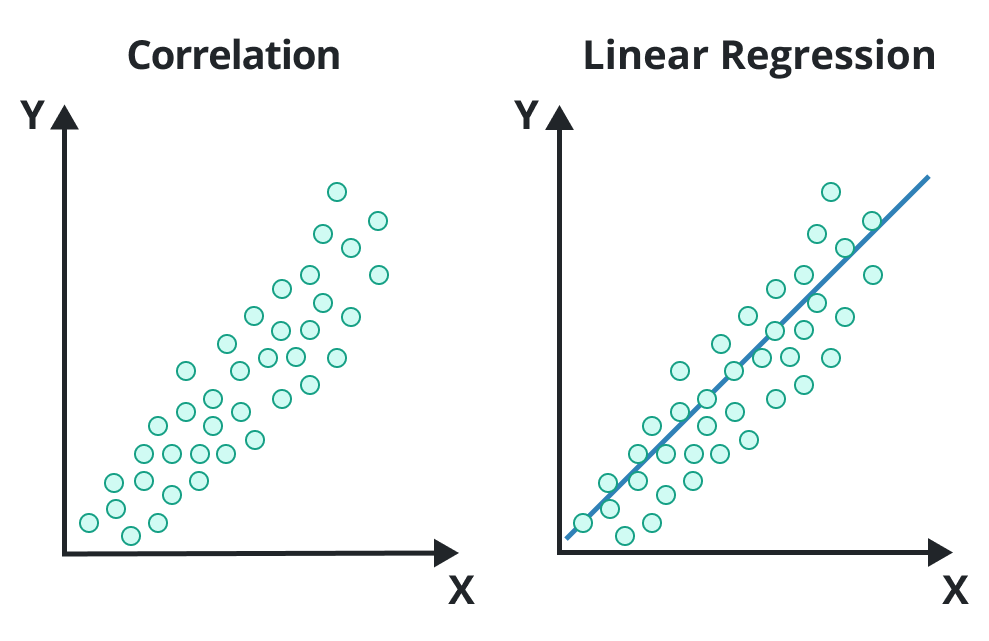

Для количественной оценки точности модели линейной регрессии часто используют **сумму квадратов отклонений (Sum of Squared Errors, SSE)** — статистическую меру, которая отражает суммарную величину квадратов разностей между фактическими значениями и предсказанными моделью результатами. SSE позволяет измерить, насколько хорошо модель описывает данные: чем меньше значение SSE, тем точнее модель.

Рассчитывается SSE по следующей формуле:

$$SSE=\sum\limits_{i=1}^N(y_i-\hat{y_i})^2,$$
где:
*   $y_i$ — каждое наблюдаемое значение,
*   $\hat{y_i}$ — каждое предсказанное значение,
*   $N$ - количество наблюдений.

**Метод наименьших квадратов (МНК)** представляет собой математический подход для нахождения оптимальных параметров функции $y=ax+b$, где $a$ — свободный член (сдвиг), а $b$ — коэффициент наклона (угловой коэффициент). Суть метода заключается в минимизации суммы квадратов отклонений наблюдаемых значений от предсказанных моделью.

Оценки параметров $b$ и $a$ находят по формулам:

$$b=\frac{\overline{x\cdot y}-\bar{x}\cdot\bar{y}}{\overline{x^2}-\bar{x}^2}=\frac{cov(x,y)}{\sigma_x^2},$$
$$a=\bar{y}-b\cdot\bar{x}.$$
Здесь $cov(x,y)$ - ковариация, $\sigma^2$ - дисперсия.

### Пример

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Генерируем точки
np.random.seed(42)
x = np.linspace(1, 50, 50)
noise = np.random.normal(0, 5, size=x.shape)
a_base, b_base = 3, 5
y_base = a_base * x + b_base
y = y_base + noise

# Вычисляем параметры уравнения регрессии по методу наименьших квадратов
a = (np.mean(x * y) - np.mean(x) * np.mean(y))/(np.mean(x**2) - np.mean(x)**2)
b = np.mean(y) - a * np.mean(x)
y_pred = a * x + b

# Строим график
plt.figure(figsize=(8, 5))
plt.plot(x, y_base, label=f'Исходная функция: f(x) = {a_base}x + {b_base}\n(MSE = {np.round(mse(y, y_base), 2)})', color='black')
plt.plot(x, y_pred, label=f'Регрессионная функция: f(x) = {np.round(a, 2)}x + {np.round(b, 2)}\n(MSE = {np.round(mse(y, y_pred), 2)})', color='red')
sns.scatterplot(x=x, y=y, color='blue')
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='blue')
plt.title('График линейной регрессии по МНК')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Классификация

**Классификация** — это задача отнесения объекта к одному из заранее определённых классов на основании его формализованных признаков. В отличие от регрессии, где предсказываются непрерывные значения, классификация фокусируется на предсказании дискретных меток, таких как «да» или «нет», «красный» или «синий», «болен» или «здоров».

## Метрики классификации

**Точность (accuracy)** - доля правильно классифицированных объектов из общего числа объектов в наборе данных (тестовом). Однако, точность может быть обманчива в случае несбалансированных классов, поскольку она не учитывает соотношения ложных срабатываний.

Вычисляется по формуле:

$$accuracy=\frac{TP+TN}{TP+TN+FP+FN}.$$

In [ ]:
def accuracy(tp, tn, fp, fn):
    return (tp + tn)/(tp + tn + fp + fn)

**Точность (precision)** - доля объектов, названных моделью положительными, которые действительно являются положительными. Эта метрика важна, когда необходимо минимизировать количество ложных положительных результатов.

Вычисляется по формуле:

$$precision=\frac{TP}{TP+FP}.$$

In [ ]:
def precision(tp, fp):
    return tp/(tp + fp)

**Полнота (recall)** - доля объектов положительного класса, которые были правильно выявлены моделью. Эта метрика важна, когда ошибка нераспознания положительного класса имеет большие последствия.

Вычисляется по формуле:

$$recall=\frac{TP}{TP+FN}.$$

In [ ]:
def recall(tp, fn):
    return tp/(tp + fn)

Где:
*   **TP** — true positive, истинный положительный, то есть ответ, который классифицирован как 1 и на самом деле ответ должен быть 1.

*   **TN** — true negative, истинный отрицательный, то есть ответ, который классифицирован как 0 и на самом деле ответ должен быть 0.

*   **FP** — false positive, ложный положительный, то есть ответ, который классифицирован как 1, но на самом деле ответ должен быть 0.

*   **FN** — false negative, ложный отрицательный, то есть ответ, который классифицирован как 0, но на самом деле ответ должен быть 1.

Эти метрики являются фундаментальными для оценки качества и производительности моделей бинарной классификации.

**F1-мера (F1-score)** - среднее гармоническое точности и полноты, что позволяет объединить эти две метрики в одну. Эта метрика полезна, когда точность и полнота имеют одинаковую важность.

Вычисляется по формуле:

$$F_1=2\cdot\frac{precision \cdot recall}{precision+recall}.$$

In [ ]:
def f1_score(precision, recall):
    return 2 * precision * recall/(precision + recall)

В библиотеке scikit-learn также есть готовые функции для оценки качества моделей классификации.

## Логистическая регрессия методом максимального правдоподобия

**Логистическая регрессия или логит-модель** — статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой. Эта регрессия выдаёт ответ в виде вероятности бинарного события (1 или 0).


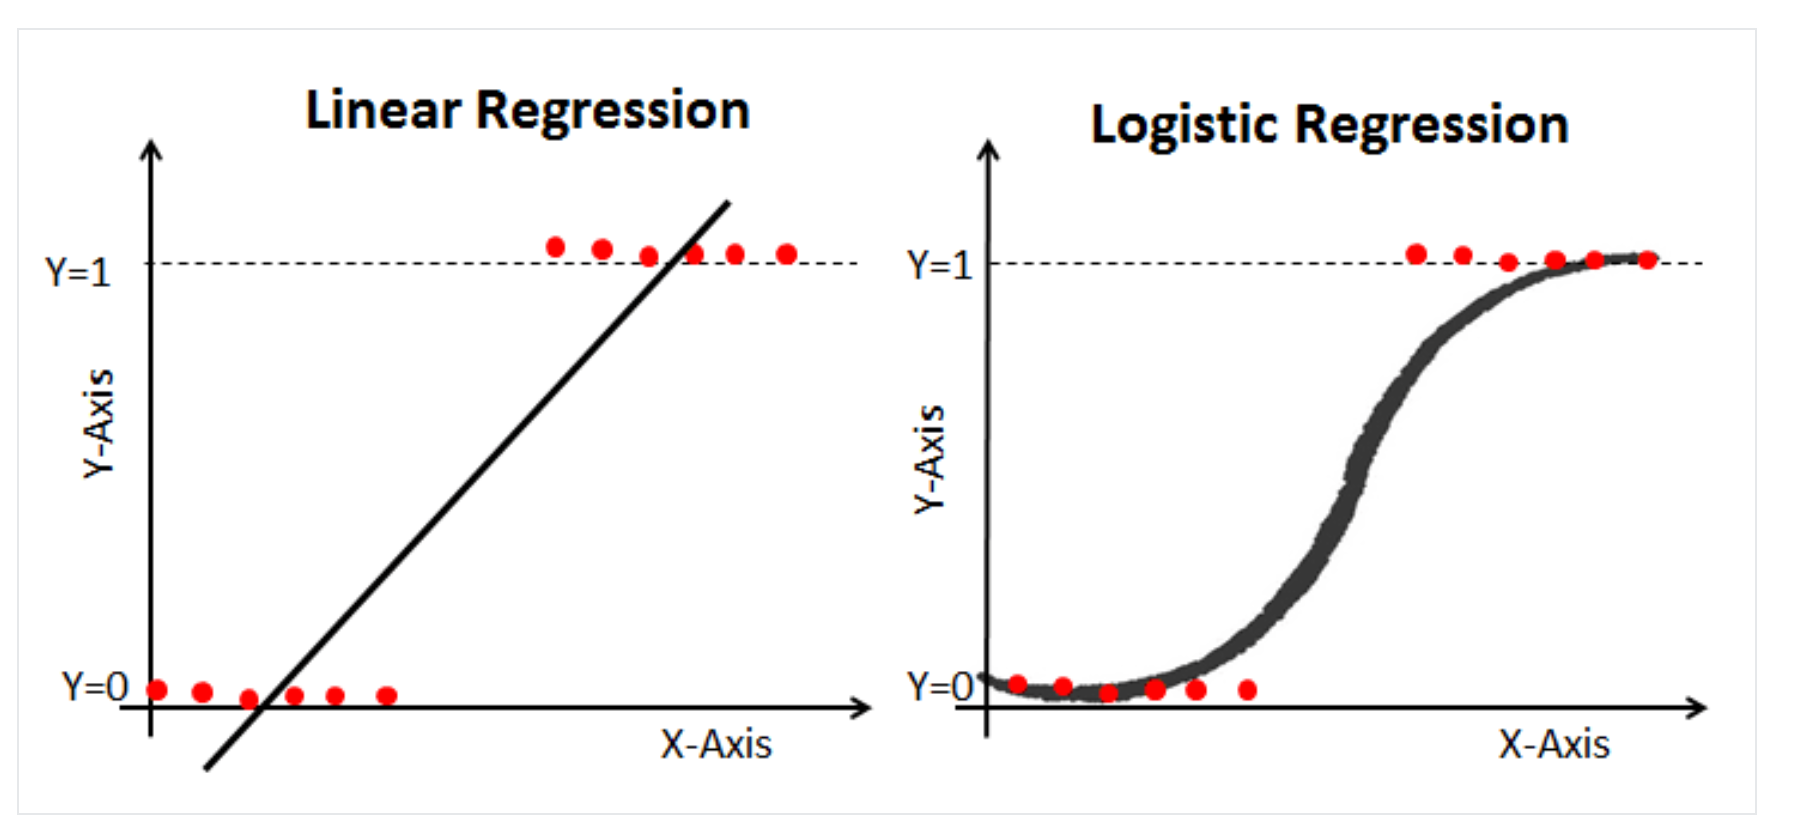

Модель логистической регрессии строится на основе линейной функции от признаков с добавлением смещения, обычно представляемого как свободный член. Для удобства вектор признаков дополняется фиктивным признаком, равным единице, и расширяется до вида $x'=(1,x_1,\ldots,x_n)$. Тогда линейная комбинация параметров и признаков записывается как

$$z=w^Tx'=w_0+\sum\limits_{j=1}^mw_jx_j,$$
где $w=(w_0,w_1,...,w_m)$ - вектор параметров модели, включающий смещение $w_0$.

Поскольку задача стоит в прогнозировании вероятности, полученное линейное выражение $z$ преобразуется с помощью **сигмоидальной функции** (логистической функции):

$$\hat{y}=\sigma(z)=\frac{1}{1+e^{-z}}.$$

Функция $\sigma(z)$ ограничивает значение выхода в интервал от 0 до 1, что позволяет интерпретировать $y$ как вероятность принадлежности объекта к классу 1.

Для обучения модели необходимо подобрать параметры $w$, обеспечивающие наилучшее соответствие предсказанных вероятностей истинным меткам обучающих объектов. Такая задача решается с помощью максимизации **функции правдоподобия**, которая при данном предположении и независимости выборки сводится к минимизации отрицательного логарифма правдоподобия. В практике машинного обучения чаще используют среднее значение потерь по выборке:

$$E(w)=-\frac{1}{N}\sum\limits_{i=1}^N[y_i\log\hat{y_i}+(1-y_i)\log(1-\hat{y_i})]$$
где:
*   $y_i$ — каждое наблюдаемое значение,
*   $\hat{y_i}$ — каждое предсказанное значение,
*   $N$ - количество наблюдений.

Для решения задачи оптимизации используется **градиентный спуск** — метод, который итеративно корректирует параметры модели, двигаясь в направлении уменьшения функции потерь. Градиент функции $E(w)$ по параметру $w_i$ вычисляется как

$$\frac{\partial{E}}{\partial{w_j}}=\frac{1}{N}\sum\limits_{i=1}^N(\hat{y_i}-y_i)x'_{ij},$$

где $x'_{ij}$ — значение $j$-го признака для объекта $i$. Для смещения $x'_{i0}=1$.

Обновление параметров происходит по правилу

$$w_j:=w_j-\eta\frac{\partial{E}}{\partial{w_j}},$$
где $\eta$ — положительный гиперпараметр, задающий скорость обучения. Этот процесс повторяется до тех пор, пока функция потерь не перестанет существенно уменьшаться, что будет означать достижение сходимости алгоритма.

### Пример

Импорт библиотек

In [ ]:
import numpy as np
import math
import random
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_UP

Генерация данных

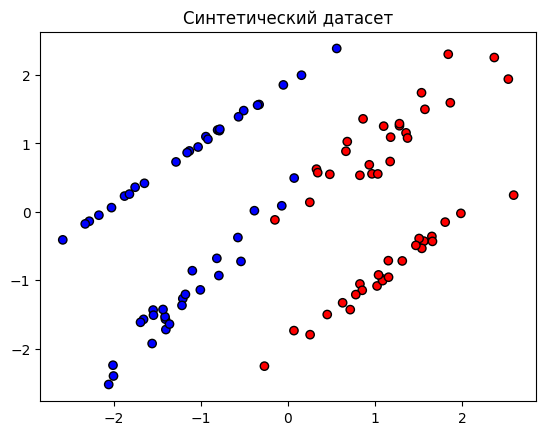

In [ ]:
# Сгенерируем простой датасет для теста
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    random_state=42
)

# Визуализируем датасет
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('Синтетический датасет')
plt.show()

Обучение

Выходные данные были обрезаны до нескольких последних строк (5000).
5000: LogLoss = 0.08
5001: LogLoss = 0.08
5002: LogLoss = 0.08
5003: LogLoss = 0.08
5004: LogLoss = 0.08
5005: LogLoss = 0.08
5006: LogLoss = 0.08
5007: LogLoss = 0.08
5008: LogLoss = 0.08
5009: LogLoss = 0.08
5010: LogLoss = 0.08
5011: LogLoss = 0.08
5012: LogLoss = 0.08
5013: LogLoss = 0.08
5014: LogLoss = 0.08
5015: LogLoss = 0.08
5016: LogLoss = 0.08
5017: LogLoss = 0.08
5018: LogLoss = 0.08
5019: LogLoss = 0.08
5020: LogLoss = 0.08
5021: LogLoss = 0.08
5022: LogLoss = 0.08
5023: LogLoss = 0.08
5024: LogLoss = 0.08
5025: LogLoss = 0.08
5026: LogLoss = 0.08
5027: LogLoss = 0.08
5028: LogLoss = 0.08
5029: LogLoss = 0.08
5030: LogLoss = 0.08
5031: LogLoss = 0.08
5032: LogLoss = 0.08
5033: LogLoss = 0.08
5034: LogLoss = 0.08
5035: LogLoss = 0.08
5036: LogLoss = 0.08
5037: LogLoss = 0.08
5038: LogLoss = 0.08
5039: LogLoss = 0.08
5040: LogLoss = 0.08
5041: LogLoss = 0.08
5042: LogLoss = 0.08
5043: LogLoss = 0.08
5044: Lo

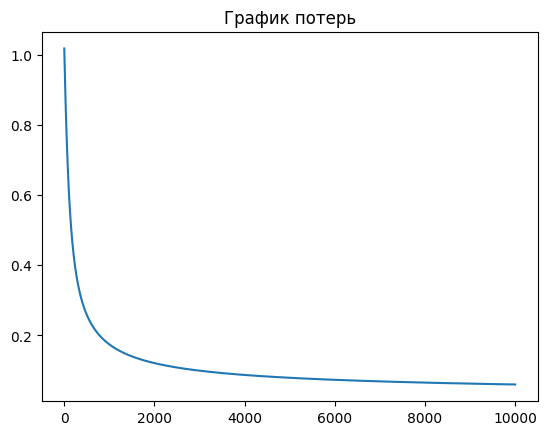

In [ ]:
# Задаем параметры обучения
N, m = X.shape
learning_rate = 0.01
iters = 10000

# Вводим фиктивный признак
X_bias = np.hstack((np.ones((N, 1)), X))

# Инициализация трёх весов случайными числами в диапазоне [-1, 1]
weights = [random.randint(-100, 100) / 100 for _ in range(m + 1)]

loss = []

# Меняем веса заданное количество эпох
for iter in range(iters):
    z = np.dot(X_bias, weights)
    y_pred = 1 / (1 + np.exp(-z))

    gradient = np.dot(X_bias.T, y_pred - y)

    weights -= learning_rate * gradient / N

    y_pred_clip = np.clip(y_pred, 1e-15, 1 - 1e-15)
    log_loss = -np.mean(y * np.log(y_pred_clip) + (1 - y) * np.log(1 - y_pred_clip))
    loss.append(log_loss)

    print(f"{iter}: LogLoss = {log_loss:.2f}")

# Визуализируем потери
plt.plot(loss)
plt.title('График потерь')
plt.show()

Оценка

In [ ]:
# Функция для округления по правилам арифметики
def round_half_up(n):
    return int(Decimal(n).to_integral_value(rounding=ROUND_HALF_UP))

# Векторизуем функцию для работы с массивом numpy
round_half_up_vec = np.vectorize(round_half_up)
y_pred_round = round_half_up_vec(y_pred)

# Вычисляем метрики
tp = np.sum((y == 1) & (y_pred_round == 1))
tn = np.sum((y == 0) & (y_pred_round == 0))
fp = np.sum((y == 0) & (y_pred_round == 1))
fn = np.sum((y == 1) & (y_pred_round == 0))

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)

print(f"Accuracy = {accuracy:.2f}")
print(f"Precision = {precision:.2f}")
print(f"Recall = {recall:.2f}")
print(f"F1-score = {f1_score:.2f}")

Accuracy = 0.99
Precision = 1.00
Recall = 0.98
F1-score = 0.99
